In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
installs = pd.read_csv(r'C:\Users\lauta\Desktop\TP Orga\installs.csv.gzip', compression='gzip')

In [3]:
clicks = pd.read_csv(r'C:\Users\lauta\Desktop\TP Orga\clicks.csv.gzip', compression='gzip')

In [4]:
#se tomaron estas columnas particulares ya que parecían las más importantes y mi computadora no me dejaba cargar más
events = pd.read_csv(r'C:\Users\lauta\Desktop\TP Orga\events.csv.gzip', compression='gzip', usecols=['ip_address','attributed','ref_hash','application_id','date','event_id','kind','trans_id'],dtype={'trans_id':'category'})

In [ ]:
df_auctions = pd.read_csv("auctions.csv.gzip", compression='gzip')

In [5]:
installs.head()

,created,application_id,ref_type,ref_hash,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language
0,2019-03-13 01:43:33.445,0,1891515180541284343,8464844987297247076,NaN,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,5529284367937637301,NaN
1,2019-03-13 04:58:35.078,0,1891515180541284343,3250564871270161533,NaN,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,6098022721363533304,NaN
2,2019-03-13 04:20:57.666,0,1891515180541284343,7953318831018100268,NaN,False,True,6333597102633388268,5.137992e+17,6.026543e+18,HasOffers Mobile AppTracking v1.0,NaN,0bfa9b4c-e07a-4522-b32d-138e3165ac98,Open,NaN,NaN,4636407223847323867,3.301378e+18
3,2019-03-13 04:20:57.698,0,1891515180541284343,7953318831018100268,NaN,False,False,6333597102633388268,5.137992e+17,6.026543e+18,NaN,NaN,NaN,NaN,NaN,NaN,4636407223847323867,NaN
4,2019-03-10 22:24:56.684,0,1891515180541284343,8355110941557237501,NaN,False,True,6333597102633388268,1.083369e+18,7.876612e+18,HasOffers Mobile AppTracking v1.0,NaN,8f235a8c-41bf-4399-b33d-c41577c949b0,Open,NaN,NaN,685400811232710215,3.301378e+18


In [6]:
clicks.head()

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
0,2,NaN,4,2019-03-06T22:42:12.755Z,6333597102633388268,1.205689,1.070234,False,1.0,iGgClCM9exiHF4K31g94XmvHEBSLKIY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,1.563,0.905,0.078,1891515180541284343,1904083516767779093
1,0,NaN,0,2019-03-08T10:24:30.641Z,6333597102633388268,1.218924,1.071209,False,4.0,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,3.025219e+18,NaN,1.774085e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666
2,0,NaN,0,2019-03-08T15:24:16.069Z,6333597102633388268,1.205689,1.070234,False,6.0,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,5.975656e+18,NaN,3.072849e+18,392184377613098015,NaN,NaN,0.946,0.473,1891515180541284343,6958163894863846647
3,2,NaN,3,2019-03-06T03:08:51.543Z,6333597102633388268,1.205689,1.070234,False,45.0,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,19.013,0.035,0.431,1891515180541284343,4368617728156436525
4,2,NaN,3,2019-03-06T03:32:55.570Z,6333597102633388268,1.205689,1.070234,False,45.0,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,28.110,0.054,0.423,1891515180541284343,4368617728156436525


In [7]:
events.head()

,date,event_id,ref_hash,application_id,attributed,trans_id,kind,ip_address
0,2019-03-05 00:09:36.966,0,2688759737656491380,38,False,NaN,5.516623e+18,7858558567428669000
1,2019-03-05 00:09:38.920,1,2688759737656491380,38,False,NaN,9.977660e+17,7858558567428669000
2,2019-03-05 00:09:26.195,0,2688759737656491380,38,False,NaN,5.516623e+18,7858558567428669000
3,2019-03-05 00:09:31.107,2,2688759737656491380,38,False,NaN,8.561153e+18,6324037615828123965
4,2019-03-09 21:00:36.585,3,2635154697734164782,38,False,NaN,8.731902e+17,2894495631302821483


In [8]:
#paso la columna 'created' a fecha y hora en los dataframes
installs['created'] = pd.to_datetime(installs['created'])
clicks['created'] = pd.to_datetime(clicks['created'])
events['date'] = pd.to_datetime(events['date'])

In [9]:
#agrego una columna con la hora de cada instalacion, click o evento
installs['hora'] = installs['created'].dt.hour
clicks['hora'] = clicks['created'].dt.hour
events['hora'] = events['date'].dt.hour

In [10]:
#agrego una columna con la fecha de cada instalacion, click o evento
installs['fecha'] = installs['created'].dt.date
clicks['fecha'] = clicks['created'].dt.date
events['fecha'] = events['date'].dt.date

## Análisis de cantidades por hora

### Análisis por separado

In [11]:
installs_hora = installs.groupby('hora').agg({'hora':'count'}).rename(columns={'hora':'cantidad de instalaciones'})

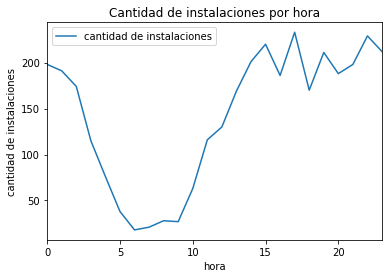

In [12]:
installs_hora.plot(title='Cantidad de instalaciones por hora').set_ylabel('cantidad de instalaciones');

In [13]:
clicks_hora = clicks.groupby('hora').agg({'hora':'count'}).rename(columns={'hora':'cantidad de clicks'})

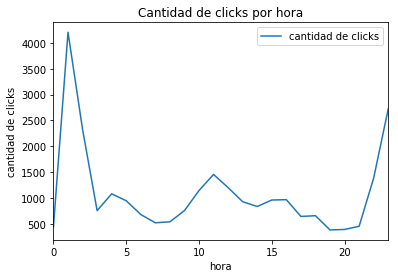

In [14]:
clicks_hora.plot(title='Cantidad de clicks por hora').set_ylabel('cantidad de clicks');

In [15]:
events_hora = events.groupby('hora').agg({'hora':'count'}).rename(columns={'hora':'cantidad de eventos'})

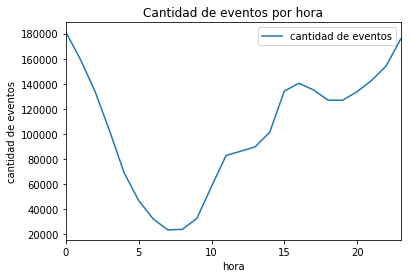

In [16]:
events_hora.plot(title='Cantidad de eventos por hora').set_ylabel('cantidad de eventos');

### Análisis en conjunto

In [17]:
df_clicks_grouped_hora = clicks.groupby('hora').agg({'hora':'count'}).rename(columns={'hora':'cantidad de clicks'})
df_clicks_grouped_hora

,cantidad de clicks
hora,
0,440
1,4209
2,2327
3,754
4,1079
5,945
6,678
7,518
8,537


In [18]:
df_installs_grouped_hora = installs.groupby('hora').agg({'hora':'count'}).rename(columns={'hora':'cantidad de instalaciones'})
df_installs_grouped_hora

,cantidad de instalaciones
hora,
0,198
1,191
2,174
3,115
4,76
5,38
6,18
7,21
8,28


In [19]:
df_merge_hora = pd.merge(df_clicks_grouped_hora,df_installs_grouped_hora, on='hora', how='inner')

In [20]:
df_merge_hora['porcentaje_exitoso'] = df_merge_hora['cantidad de instalaciones']*100/df_merge_hora['cantidad de clicks']
df_merge_hora.sort_values('cantidad de clicks')

,cantidad de clicks,cantidad de instalaciones,porcentaje_exitoso
hora,,,
19,380,211,55.526316
20,389,188,48.329049
0,440,198,45.000000
21,451,198,43.902439
7,518,21,4.054054
8,537,28,5.214153
17,641,233,36.349454
18,655,170,25.954198
6,678,18,2.654867


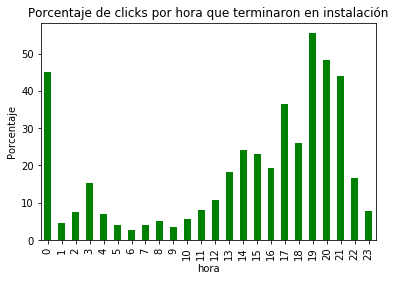

In [21]:
grafico_porcentaje_hora = df_merge_hora['porcentaje_exitoso'].plot(kind='bar',color='green');
grafico_porcentaje_hora.set_title('Porcentaje de clicks por hora que terminaron en instalación');
grafico_porcentaje_hora.set_ylabel('Porcentaje');

## Análisis de cantidades por día

### Análisis por separado

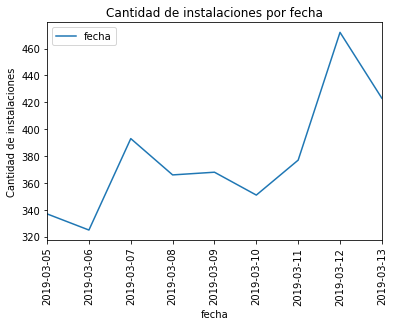

In [22]:
installs_fecha = installs.groupby('fecha').agg({'fecha':'count'})
installs_fecha.plot(title = 'Cantidad de instalaciones por fecha',rot=90).set_ylabel('Cantidad de instalaciones');

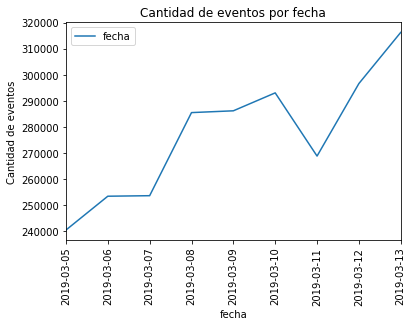

In [23]:
events_fecha = events.groupby('fecha').agg({'fecha':'count'})
events_fecha.plot(title = 'Cantidad de eventos por fecha',rot=90).set_ylabel('Cantidad de eventos');

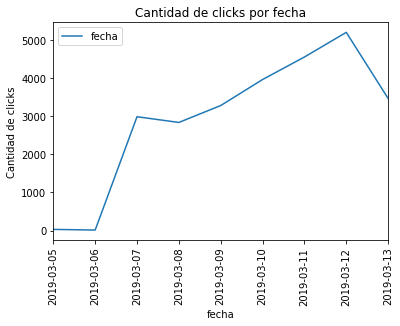

In [24]:
clicks_fecha = clicks.groupby('fecha').agg({'fecha':'count'})
clicks_fecha.plot(title = 'Cantidad de clicks por fecha',rot=90).set_ylabel('Cantidad de clicks');

In [25]:
df_clicks_grouped_fecha = clicks.groupby('fecha').agg({'fecha':'count'}).rename(columns={'fecha':'cantidad_de_clicks'})

In [26]:
df_clicks_grouped_fecha.sort_values('cantidad_de_clicks')

,cantidad_de_clicks
fecha,
2019-03-06,14
2019-03-05,31
2019-03-08,2839
2019-03-07,2989
2019-03-09,3283
2019-03-13,3468
2019-03-10,3966
2019-03-11,4557
2019-03-12,5204


In [27]:
df_installs_grouped_fecha = installs.groupby('fecha').agg({'fecha':'count'}).rename(columns={'fecha':'cantidad_de_instalaciones'})

In [28]:
df_installs_grouped_fecha

,cantidad_de_instalaciones
fecha,
2019-03-05,337
2019-03-06,325
2019-03-07,393
2019-03-08,366
2019-03-09,368
2019-03-10,351
2019-03-11,377
2019-03-12,472
2019-03-13,423


In [29]:
df_merge = pd.merge(df_clicks_grouped_fecha, df_installs_grouped_fecha, on='fecha', how='inner')

In [30]:
df_merge

,cantidad_de_clicks,cantidad_de_instalaciones
fecha,,
2019-03-05,31,337
2019-03-06,14,325
2019-03-07,2989,393
2019-03-08,2839,366
2019-03-09,3283,368
2019-03-10,3966,351
2019-03-11,4557,377
2019-03-12,5204,472
2019-03-13,3468,423


In [31]:
df_merge['porcentaje_exitoso'] = df_merge['cantidad_de_instalaciones']*100/df_merge['cantidad_de_clicks']
df_merge

,cantidad_de_clicks,cantidad_de_instalaciones,porcentaje_exitoso
fecha,,,
2019-03-05,31,337,1087.096774
2019-03-06,14,325,2321.428571
2019-03-07,2989,393,13.148210
2019-03-08,2839,366,12.891863
2019-03-09,3283,368,11.209260
2019-03-10,3966,351,8.850227
2019-03-11,4557,377,8.272987
2019-03-12,5204,472,9.069946
2019-03-13,3468,423,12.197232


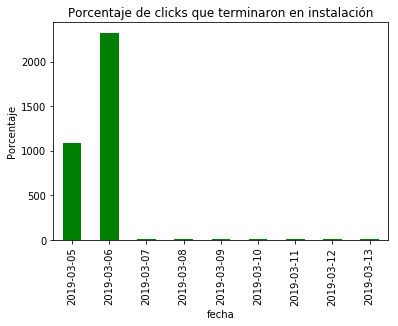

In [32]:
grafico_porcentaje = df_merge['porcentaje_exitoso'].plot(kind='bar',color='green');
grafico_porcentaje.set_title('Porcentaje de clicks que terminaron en instalación');
grafico_porcentaje.set_ylabel('Porcentaje');

In [33]:
df_merge = df_merge.reset_index()
df_merge = df_merge[df_merge['fecha'] > datetime.date(2019,3,6)]
df_merge = df_merge.set_index('fecha')

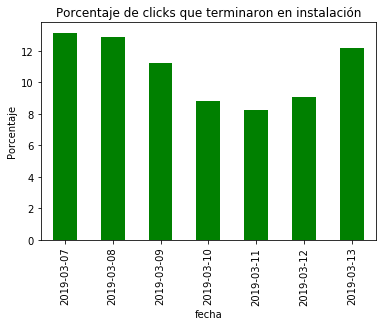

In [34]:
grafico_porcentaje = df_merge['porcentaje_exitoso'].plot(kind='bar',color='green');
grafico_porcentaje.set_title('Porcentaje de clicks que terminaron en instalación');
grafico_porcentaje.set_ylabel('Porcentaje');

## Análisis de cantidades

### Clicks según el tiempo de demora en clickear por parte del usuario

In [35]:
intervalo = [0,2,300,clicks['timeToClick'].max()]
clicks_cat = pd.cut(clicks['timeToClick'],bins=intervalo,labels=['muy pronto','a tiempo','muy lento'])

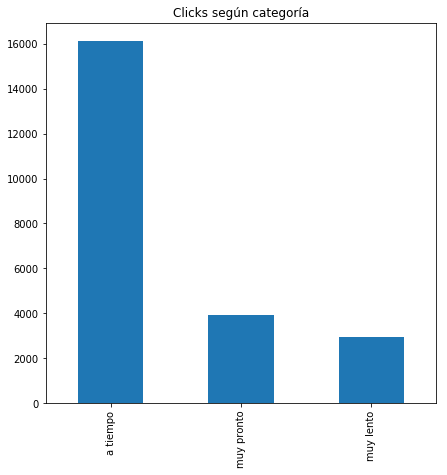

In [36]:
clicks_cat.value_counts().plot(kind='bar', title='Clicks según categoría',figsize=(7,7));

### Cantidad de eventos atribuidos a Jampp

In [37]:
events[events['attributed']==True] = events[events['attributed']==True].apply(lambda x: x.replace(True,'Sí'))
events[events['attributed']==False] = events[events['attributed']==False].apply(lambda x: x.replace(False,'No'))

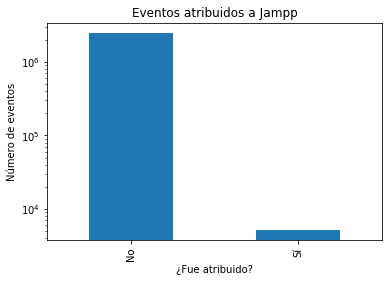

In [38]:
grafico_eventos_atribuidos = events['attributed'].value_counts().plot(kind='bar',logy=True);
grafico_eventos_atribuidos.set_xlabel('¿Fue atribuido?');
grafico_eventos_atribuidos.set_ylabel('Número de eventos');
grafico_eventos_atribuidos.set_title('Eventos atribuidos a Jampp');

### Eventos atribuidos a Jampp por hora

In [39]:
events = pd.read_csv(r'C:\Users\lauta\Desktop\TP Orga\events.csv.gzip', compression='gzip', usecols=['ip_address','attributed','ref_hash','application_id','date','event_id','kind','trans_id'],dtype={'trans_id':'category'})

In [40]:
#eventos atribuidos a Jampp
events_true = events[events['attributed']==True].copy()

In [41]:
events_true['date'] = pd.to_datetime(events_true['date'])
events_true['hora'] = events_true['date'].dt.hour
events_true['fecha'] = events_true['date'].dt.date

In [42]:
events_true_user = events_true.groupby('ref_hash').agg({'ref_hash':'count'}).rename(columns={'ref_hash':'eventos_usuario'}).sort_values('eventos_usuario')

In [43]:
events_merge = pd.merge(events_true_user,events_true,on='ref_hash',how='inner')

In [44]:
events_merge.shape

(5099, 11)

In [45]:
#los 10 usuarios que más eventos atribuidos a Jampp generaron
events_merge_top_10 = events_merge[events_merge['eventos_usuario']>=56]

In [46]:
events_merge_top_10

,ref_hash,eventos_usuario,date,event_id,application_id,attributed,trans_id,kind,ip_address,hora,fecha
4287,4923328447417029910,56,2019-03-08 00:07:22.217,41,45,True,NaN,NaN,1218059601236466412,0,2019-03-08
4288,4923328447417029910,56,2019-03-08 00:08:02.387,41,45,True,NaN,NaN,1218059601236466412,0,2019-03-08
4289,4923328447417029910,56,2019-03-08 00:17:42.933,41,45,True,NaN,NaN,1218059601236466412,0,2019-03-08
4290,4923328447417029910,56,2019-03-08 00:08:35.396,41,45,True,NaN,NaN,1218059601236466412,0,2019-03-08
4291,4923328447417029910,56,2019-03-08 00:08:39.956,40,45,True,NaN,NaN,1218059601236466412,0,2019-03-08
4292,4923328447417029910,56,2019-03-08 00:16:54.480,40,45,True,NaN,NaN,1218059601236466412,0,2019-03-08
4293,4923328447417029910,56,2019-03-08 00:17:39.338,41,45,True,NaN,NaN,1218059601236466412,0,2019-03-08
4294,4923328447417029910,56,2019-03-08 00:18:37.274,41,45,True,NaN,NaN,1218059601236466412,0,2019-03-08
4295,4923328447417029910,56,2019-03-08 00:19:01.576,41,45,True,NaN,NaN,1218059601236466412,0,2019-03-08
4296,4923328447417029910,56,2019-03-06 20:14:31.765,40,45,True,NaN,NaN,3346762765334313598,20,2019-03-06


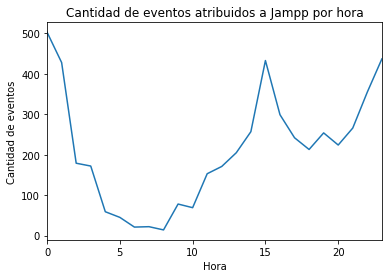

In [47]:
g = events_true['hora'].value_counts().sort_index().plot();
g.set_xlabel('Hora');
g.set_ylabel('Cantidad de eventos');
g.set_title('Cantidad de eventos atribuidos a Jampp por hora');

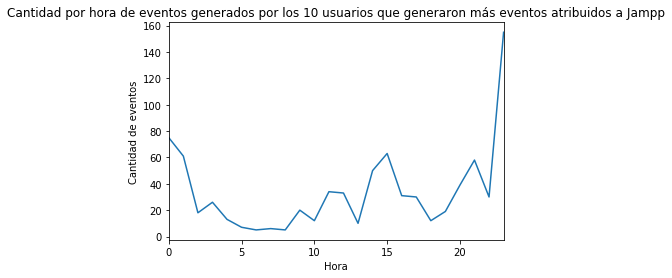

In [48]:
g = events_merge_top_10['hora'].value_counts().sort_index().plot();
g.set_title('Cantidad por hora de eventos generados por los 10 usuarios que generaron más eventos atribuidos a Jampp');
g.set_xlabel('Hora');
g.set_ylabel('Cantidad de eventos');

### Aplicaciones en las que se generaron los eventos

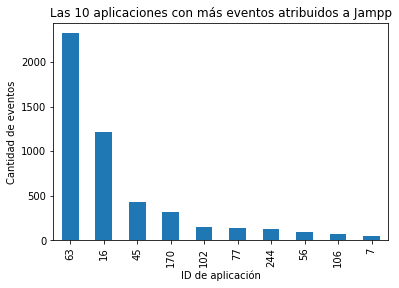

In [49]:
g = events_true['application_id'].value_counts().nlargest(10).plot(kind='bar');
g.set_xlabel('ID de aplicación');
g.set_ylabel('Cantidad de eventos');
g.set_title('Las 10 aplicaciones con más eventos atribuidos a Jampp');

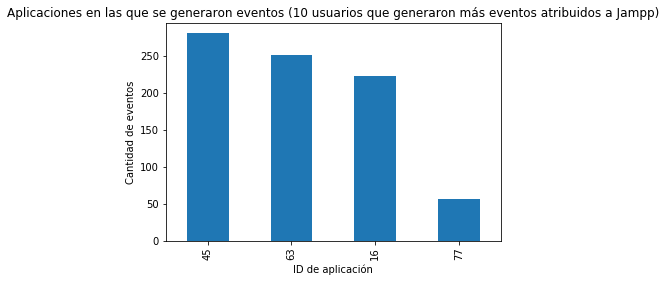

In [50]:
g = events_merge_top_10['application_id'].value_counts().plot(kind='bar');
g.set_title('Aplicaciones en las que se generaron eventos (10 usuarios que generaron más eventos atribuidos a Jampp)');
g.set_ylabel('Cantidad de eventos');
g.set_xlabel('ID de aplicación');

### Eventos atribuidos a Jampp

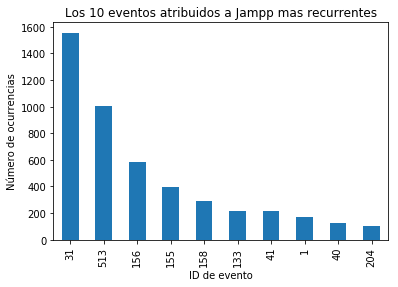

In [51]:
g = events_true['event_id'].value_counts().nlargest(10).plot(kind='bar');
g.set_xlabel('ID de evento');
g.set_ylabel('Número de ocurrencias');
g.set_title('Los 10 eventos atribuidos a Jampp mas recurrentes');

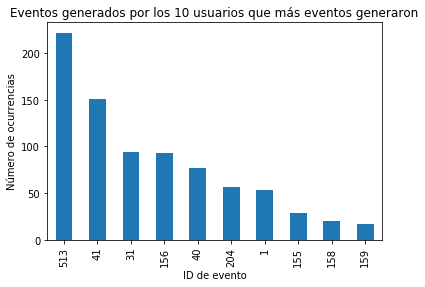

In [52]:
g = events_merge_top_10['event_id'].value_counts().plot(kind='bar');
g.set_xlabel('ID de evento');
g.set_ylabel('Número de ocurrencias');
g.set_title('Eventos generados por los 10 usuarios que más eventos generaron');

In [4]:
print(df_auctions.shape)

(19571319, 7)


In [5]:
df_auctions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19571319 entries, 0 to 19571318
Data columns (total 7 columns):
auction_type_id    float64
country            int64
date               object
device_id          int64
platform           int64
ref_type_id        int64
source_id          int64
dtypes: float64(1), int64(5), object(1)
memory usage: 1.0+ GB


In [6]:
df_auctions.head()

,auction_type_id,country,date,device_id,platform,ref_type_id,source_id
0,NaN,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0
1,NaN,6333597102633388268,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0
2,NaN,6333597102633388268,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0
3,NaN,6333597102633388268,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0
4,NaN,6333597102633388268,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0


In [7]:
df_auctions.isnull().sum()

auction_type_id    19571319
country                   0
date                      0
device_id                 0
platform                  0
ref_type_id               0
source_id                 0
dtype: int64

In [8]:
# Elimino datos no relevantes
del df_auctions["auction_type_id"]

In [9]:
df_auctions["country"].value_counts()

6333597102633388268    19571319
Name: country, dtype: int64

In [10]:
# Elimino datos no relevantes
del df_auctions["country"]

In [11]:
df_auctions["platform"].value_counts()

1    15541825
2     4029494
Name: platform, dtype: int64

In [12]:
df_auctions["platform"] = df_auctions["platform"].astype(np.int8)

In [13]:
df_auctions["ref_type_id"].value_counts()

1    15541825
7     4029494
Name: ref_type_id, dtype: int64

In [14]:
df_auctions["ref_type_id"] = df_auctions["ref_type_id"].astype(np.int8)

In [15]:
df_auctions["source_id"].value_counts()

0    13354597
1     4016739
5     1466494
2      582083
6      151406
Name: source_id, dtype: int64

In [16]:
df_auctions["source_id"] = df_auctions["source_id"].astype(np.int8)

In [17]:
df_auctions["date"] = pd.to_datetime(df_auctions["date"])
df_auctions["fecha"] = df_auctions["date"].dt.date
df_auctions["hora"] = df_auctions["date"].dt.hour
del df_auctions["date"]

In [18]:
df_auctions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19571319 entries, 0 to 19571318
Data columns (total 6 columns):
device_id      int64
platform       int8
ref_type_id    int8
source_id      int8
fecha          object
hora           int64
dtypes: int64(2), int8(3), object(1)
memory usage: 503.9+ MB


In [19]:
df_auctions.describe()

,device_id,platform,ref_type_id,source_id,hora
count,1.957132e+07,1.957132e+07,1.957132e+07,1.957132e+07,1.957132e+07
mean,4.599151e+18,1.205888e+00,2.235326e+00,6.857898e-01,1.204614e+01
std,2.667138e+18,4.043488e-01,2.426093e+00,1.416215e+00,7.699388e+00
min,1.138588e+14,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.258716e+18,1.000000e+00,1.000000e+00,0.000000e+00,4.000000e+00
50%,4.616600e+18,1.000000e+00,1.000000e+00,0.000000e+00,1.400000e+01
75%,6.911427e+18,1.000000e+00,1.000000e+00,1.000000e+00,1.900000e+01
max,9.223339e+18,2.000000e+00,7.000000e+00,6.000000e+00,2.300000e+01


In [20]:
df_auctions.head()

,device_id,platform,ref_type_id,source_id,fecha,hora
0,6059599345986491085,1,1,0,2019-03-11,14
1,1115994996230693426,1,1,0,2019-03-11,14
2,7463856250762200923,1,1,0,2019-03-11,14
3,7829815350267792040,1,1,0,2019-03-11,14
4,1448534231953777480,1,1,0,2019-03-11,14


In [21]:
df_auctions["fecha"].value_counts()

2019-03-13    2938373
2019-03-12    2779910
2019-03-10    2637534
2019-03-11    2574916
2019-03-08    2303002
2019-03-09    2074552
2019-03-07    2047661
2019-03-05    1182401
2019-03-06    1032970
Name: fecha, dtype: int64

In [22]:
df_auctions["hora"].value_counts()

2     1388464
1     1371091
23    1173841
22    1108219
3     1027541
21    1015053
0     1005716
19     994381
18     989528
17     967539
16     941866
20     933318
15     883824
14     805579
12     748935
13     741996
4      716194
11     627907
10     494726
5      487243
9      329604
6      325730
8      247915
7      245109
Name: hora, dtype: int64

## Cantidad de subastas por hora segun plataforma

In [26]:
df_subastas_por_hora = df_auctions.groupby(['hora','platform']).agg({'hora':'count'}).rename(columns={'hora':'cantidad_de_subastas'})
df_subastas_por_hora

cantidad_de_subastas
hora platform                      
0    1                       755945
     2                       249771
1    1                      1085385
     2                       285706
2    1                      1123515
     2                       264949
3    1                       829257
     2                       198284
4    1                       572832
     2                       143362
5    1                       390653
     2                        96590
6    1                       260795
     2                        64935
7    1                       199504
     2                        45605
8    1                       206284
     2                        41631
9    1                       275170
     2                        54434
10   1                       404401
     2                        90325
11   1                       514741
     2                       113166
12   1                       620165
     2                       128770
13   1                       599788
     2                       142208
14   1                       650205
     2                       155374
15   1                       713579
     2                       170245
16   1                       758160
     2                       183706
17   1                       780335
     2                       187204
18   1                       794921
     2                       194607
19   1                       788866
     2                       205515
20   1                       702707
     2                       230611
21   1                       761798
     2                       253255
22   1                       849657
     2                       258562
23   1                       903162
     2                       270679

Text(0.5,1,'Cantidad de subastas por hora segun plataforma')

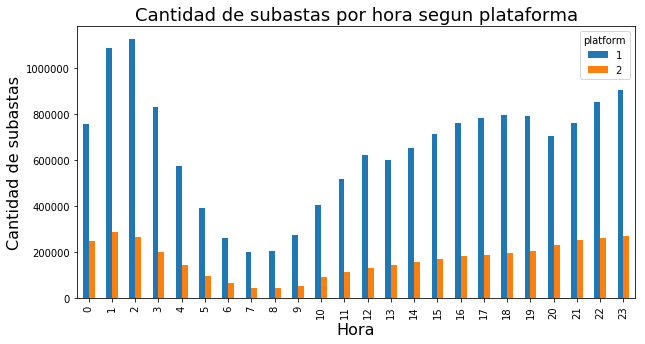

In [30]:
tabla_subastas = pd.pivot_table(df_subastas_por_hora, index='hora', columns='platform', values='cantidad_de_subastas')
grafico_subastas_por_hora = tabla_subastas.plot(kind='bar', figsize=(10,5))
grafico_subastas_por_hora.set_xlabel('Hora', fontsize=16)
grafico_subastas_por_hora.set_ylabel('Cantidad de subastas', fontsize=16)
grafico_subastas_por_hora.set_title('Cantidad de subastas por hora segun plataforma',fontsize=18)

In [ ]:
df_events = pd.read_csv("events.csv.gzip", compression='gzip')

In [40]:
df_events.shape

(2494423, 22)

In [41]:
df_events.isnull().sum()

date                        0
event_id                    0
ref_type                    0
ref_hash                    0
application_id              0
attributed                  0
device_countrycode          0
device_os_version     1472357
device_brand          1329460
device_model            87967
device_city           1879725
session_user_agent      11786
trans_id              2494341
user_agent            1102896
event_uuid               5099
carrier               1877989
kind                     5099
device_os             1836756
wifi                  1115551
connection_type       1881960
ip_address                  0
device_language         87819
dtype: int64

In [43]:
# Elimino datos no relevantes
del df_events['trans_id']

In [44]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2494423 entries, 0 to 2494422
Data columns (total 21 columns):
date                  object
event_id              int64
ref_type              int64
ref_hash              int64
application_id        int64
attributed            bool
device_countrycode    int64
device_os_version     float64
device_brand          float64
device_model          float64
device_city           float64
session_user_agent    float64
user_agent            float64
event_uuid            object
carrier               float64
kind                  float64
device_os             float64
wifi                  object
connection_type       object
ip_address            int64
device_language       float64
dtypes: bool(1), float64(10), int64(6), object(4)
memory usage: 383.0+ MB


In [45]:
df_events['date'] = pd.to_datetime(df_events['date'])
df_events['fecha'] = df_events['date'].dt.date
df_events['hora'] = df_events['date'].dt.hour
del df_events['date']

In [46]:
df_events.head()

,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,device_city,...,event_uuid,carrier,kind,device_os,wifi,connection_type,ip_address,device_language,fecha,hora
0,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,3.258215e+18,...,a9c0b263-acb2-4577-92c5-cbde5d7a5db1,2.248157e+17,5.516623e+18,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17,2019-03-05,0
1,1,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,3.258215e+18,...,1cd98205-0d97-4ec2-a019-667997dbfe7a,2.248157e+17,9.977660e+17,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17,2019-03-05,0
2,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,3.258215e+18,...,f02e2924-21ae-492b-b625-9021ae0a4eca,2.248157e+17,5.516623e+18,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17,2019-03-05,0
3,2,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,2.551781e+18,...,a813cf45-a36e-4668-85e2-5395f1564e98,2.248157e+17,8.561153e+18,7.531669e+18,NaN,Cable/DSL,6324037615828123965,4.077062e+17,2019-03-05,0
4,3,1891515180541284343,2635154697734164782,38,False,6333597102633388268,7.391844e+18,NaN,5.960896e+18,6.959330e+18,...,63a4f0aa-e147-469f-8c55-4ca4f8d0e310,2.248157e+17,8.731902e+17,7.531669e+18,NaN,Cable/DSL,2894495631302821483,3.301378e+18,2019-03-09,21


In [47]:
df_events['fecha'].value_counts()

2019-03-13    316267
2019-03-12    296665
2019-03-10    293091
2019-03-09    286221
2019-03-08    285535
2019-03-11    268884
2019-03-07    253706
2019-03-06    253505
2019-03-05    240549
Name: fecha, dtype: int64

In [48]:
df_events['hora'].value_counts()

0     181072
23    175714
1     159288
22    154274
21    142695
16    140399
17    135168
15    134192
2     133891
20    133759
18    127056
19    126855
3     102469
14    101452
13     89836
12     86290
11     82888
4      69027
10     58244
5      46961
9      32899
6      32295
8      24076
7      23623
Name: hora, dtype: int64

## Cantidad de eventos y subastas por fechas

In [ ]:
## Cantidad de eventos y subastas por horas

grafico_horas = df_auctions['hora'].value_counts().sort_index().plot(kind='bar', label='Cantidad de subastas', color='blue', figsize=(10,5))
grafico_horas = df_events['hora'].value_counts().sort_index().plot(kind='bar', label='Cantidad de eventos', color='green')

grafico_horas.set_title('Cantidad de subastas y eventos por horas', fontsize=18)
grafico_horas.set_xlabel('Hora', fontsize=16)
grafico_horas.set_ylabel('Cantidad', fontsize=16)
grafico_horas.legend()
grafico_horas

## Horarios en los que se produjeron los 5 eventos más recurrentes